# imported various python libraries

In [82]:
import pandas as pd
import datetime as dt
import pandas_datareader.data as pdr
import yfinance as yf
from scipy.stats import skew,kurtosis,norm,skewtest,kurtosistest,stats
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
yf.pdr_override()
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline
import matplotlib.dates as mdates
import seaborn as sns
sns.set()
import numpy as np
start = dt.datetime(2015,1,1)
end = dt.datetime(2021,1,1)
dj = pdr.get_data_yahoo('^DJI', start, end)
ms = pdr.get_data_yahoo('MSFT', start, end)
ap = pdr.get_data_yahoo('AAPL', start, end)
bb = pdr.get_data_yahoo('BB.TO', start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


#  Graphical representation of stocks price vs year

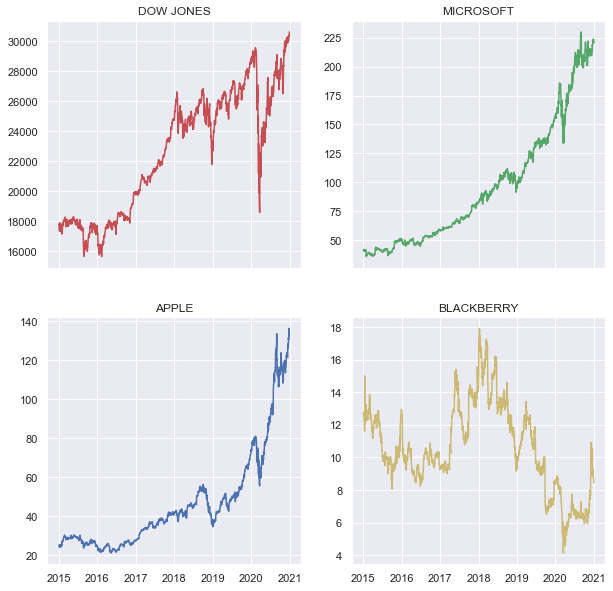

In [3]:
f, ax = plt.subplots(2, 2, figsize=(10,10), sharex=True)
f.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
f.gca().xaxis.set_major_locator(mdates.YearLocator())

ax[0,0].plot(dj.index, dj['Adj Close'], color='r')
ax[0,0].grid(True)
ax[0,0].tick_params(labelrotation=0)
ax[0,0].set_title('DOW JONES');

ax[0,1].plot(ms.index, ms['Adj Close'], color='g')
ax[0,1].grid(True)
ax[0,1].tick_params(labelrotation=0)
ax[0,1].set_title('MICROSOFT');

ax[1,0].plot(ap.index, ap['Adj Close'], color='b')
ax[1,0].grid(True)
ax[1,0].tick_params(labelrotation=0)
ax[1,0].set_title('APPLE');

ax[1,1].plot(bb.index, bb['Adj Close'], color='y')
ax[1,1].grid(True)
ax[1,1].tick_params(labelrotation=0)
ax[1,1].set_title('BLACKBERRY');

# Graphical representation of stocks price vs quaterly

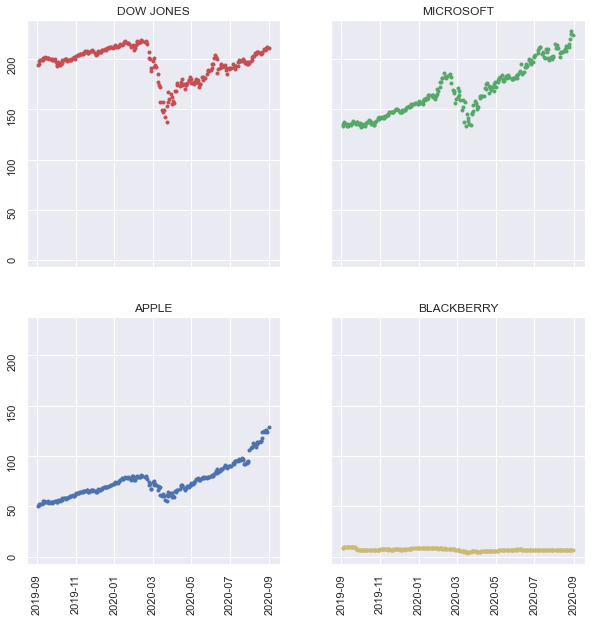

In [4]:
f, ax = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)
f.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
f.gca().xaxis.set_major_locator(mdates.MonthLocator())

dj_19= dj.loc[pd.Timestamp('2019-08-31'):pd.Timestamp('2020-08-31')]
ax[0,0].plot(dj_19.index, dj_19['Adj Close']/135, '.', color='r')
ax[0,0].grid(True)
ax[0,0].tick_params(labelrotation=90)
ax[0,0].set_title('DOW JONES');

ms_19 = ms.loc[pd.Timestamp('2019-08-31'):pd.Timestamp('2020-08-31')]
ax[0,1].plot(ms_19.index, ms_19['Adj Close'], '.' ,color='g')
ax[0,1].grid(True)
ax[0,1].tick_params(labelrotation=90)
ax[0,1].set_title('MICROSOFT');

ap_19 = ap.loc[pd.Timestamp('2019-08-31'):pd.Timestamp('2020-08-31')]
ax[1,0].plot(ap_19.index, ap_19['Adj Close'], '.' ,color='b')
ax[1,0].grid(True)
ax[1,0].tick_params(labelrotation=90)
ax[1,0].set_title('APPLE');

bb_19 = bb.loc[pd.Timestamp('2019-08-31'):pd.Timestamp('2020-08-31')]
ax[1,1].plot(bb_19.index, bb_19['Adj Close'], '.' ,color='y')
ax[1,1].grid(True)
ax[1,1].tick_params(labelrotation=90)
ax[1,1].set_title('BLACKBERRY');

# Resampling and analysing stocks price monthly via mean values

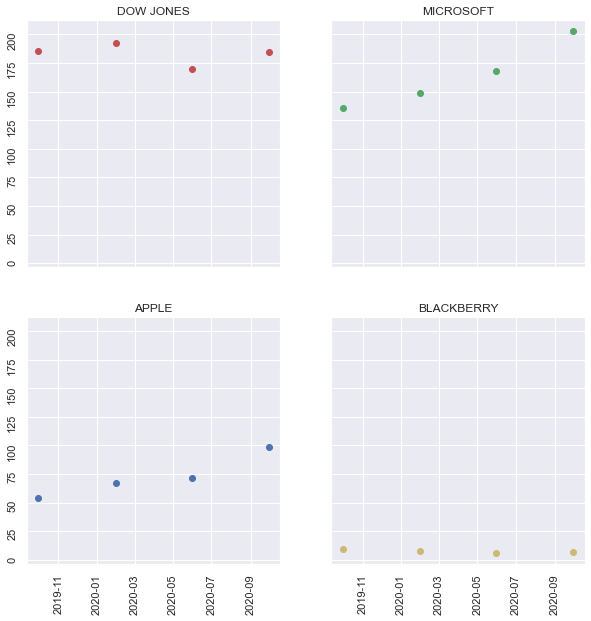

In [5]:
f, ax = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

monthly_dj_19 = dj_19.resample('4M').mean()
ax[0,0].scatter(monthly_dj_19.index, monthly_dj_19['Adj Close']/145, color='r')
ax[0,0].grid(True)
ax[0,0].tick_params(labelrotation=90)
ax[0,0].set_title('DOW JONES');

monthly_ms_19 = ms_19.resample('4M').mean()
ax[0,1].scatter(monthly_ms_19.index, monthly_ms_19['Adj Close'], color='g')
ax[0,1].grid(True)
ax[0,1].tick_params(labelrotation=90)
ax[0,1].set_title('MICROSOFT');

monthly_ap_19 = ap_19.resample('4M').mean()
ax[1,0].scatter(monthly_ap_19.index, monthly_ap_19['Adj Close'], color='b')
ax[1,0].grid(True)
ax[1,0].tick_params(labelrotation=90)
ax[1,0].set_title('APPLE');

monthly_bb_19 = bb_19.resample('4M').mean()
ax[1,1].scatter(monthly_bb_19.index, monthly_bb_19['Adj Close'], color='y')
ax[1,1].grid(True)
ax[1,1].tick_params(labelrotation=90)
ax[1,1].set_title('BLACKBERRY');

# Weekly stock price mean value scatter plots

In [ ]:
# dj_19 = dj.loc[pd.Timestamp('2019-01-15'):pd.Timestamp('2019-09-15')]
weekly_dj_19 = dj_19.resample('W').mean()

ap_19 = ap.loc[pd.Timestamp('2019-01-15'):pd.Timestamp('2019-09-15')]
weekly_ap_19 = ap_19.resample('W').mean()

ms_19 = ms.loc[pd.Timestamp('2019-01-15'):pd.Timestamp('2019-09-15')]
weekly_ms_19 = ms_19.resample('W').mean()

bb_19 = bb.loc[pd.Timestamp('2019-01-15'):pd.Timestamp('2019-09-15')]
weekly_bb_19 = bb_19.resample('W').mean()

f, ax = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)
ax[0,0].plot(weekly_ap_19.index, weekly_ap_19['Adj Close'], '-o', color='r')
ax[0,0].grid(True)
ax[0,0].tick_params(labelrotation=90)
ax[0,0].set_title('APPLE');

ax[0,1].plot(weekly_ms_19.index, weekly_ms_19['Adj Close'], '-o',color='g')
ax[0,1].grid(True)
ax[0,1].tick_params(labelrotation=90)
ax[0,1].set_title('MICROSOFT');

ax[1,0].plot(weekly_dj_19.index, weekly_dj_19['Adj Close']/135,'-o', color='b')
ax[1,0].grid(True)
ax[1,0].tick_params(labelrotation=90)
ax[1,0].set_title('DOW JONES');

ax[1,1].plot(weekly_bb_19.index, weekly_bb_19['Adj Close'], '-o', color='y')
ax[1,1].grid(True)
ax[1,1].tick_params(labelrotation=90)
ax[1,1].set_title('BLACKBERRY');

# Stock price change for calculating returns for intraday trading

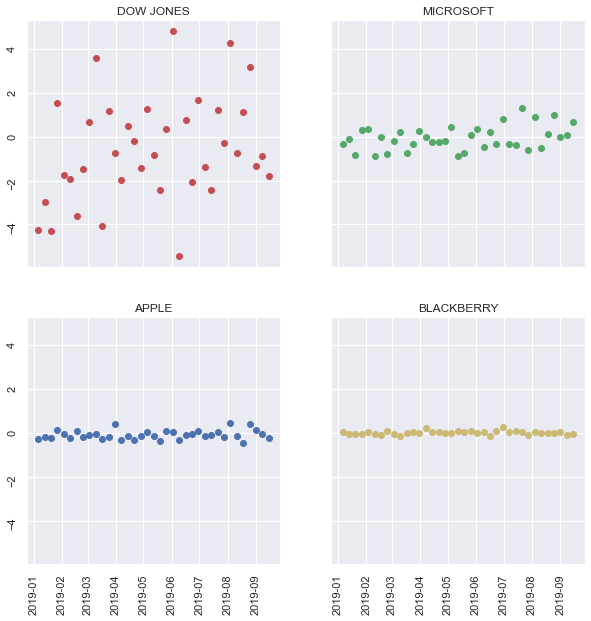

In [7]:
dj['diff'] = dj['Open'] - dj['Close']
dj_diff = dj.resample('W').mean()

ap['diff'] = ap['Open'] - ap['Close']
ap_diff = ap.resample('W').mean()

ms['diff'] = ms['Open'] - ms['Close']
ms_diff = ms.resample('W').mean()

bb['diff'] = bb['Open'] - bb['Close']
bb_diff = bb.resample('W').mean()

f, ax = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

ax[0,0].scatter(dj_diff.loc['2019-01-01':'2019-09-15'].index, dj_diff.loc['2019-01-01':'2019-09-15']['diff']/30
, color='r')
ax[0,0].grid(True)
ax[0,0].tick_params(labelrotation=90)
ax[0,0].set_title('DOW JONES');

ax[0,1].scatter(ms_diff.loc['2019-01-01':'2019-09-15'].index, ms_diff.loc['2019-01-01':'2019-09-15']['diff']
, color='g')
ax[0,1].grid(True)
ax[0,1].tick_params(labelrotation=90)
ax[0,1].set_title('MICROSOFT');

ax[1,0].scatter(ap_diff.loc['2019-01-01':'2019-09-15'].index, ap_diff.loc['2019-01-01':'2019-09-15']['diff']
, color='b')
ax[1,0].grid(True)
ax[1,0].tick_params(labelrotation=90)
ax[1,0].set_title('APPLE');

ax[1,1].scatter(bb_diff.loc['2019-01-01':'2019-09-15'].index, bb_diff.loc['2019-01-01':'2019-09-15']['diff']
, color='y')
ax[1,1].grid(True)
ax[1,1].tick_params(labelrotation=90)
ax[1,1].set_title('BLACKBERRY');

In [8]:
daily_close_ap = ap[['Adj Close']]

# Daily returns
daily_pct_change_ap = daily_close_ap.pct_change()

# Replace NA values with 0
daily_pct_change_ap.fillna(0, inplace=True)

daily_close_ms = ms[['Adj Close']]

# Daily returns
daily_pct_change_ms = daily_close_ms.pct_change()

# Replace NA values with 0
daily_pct_change_ms.fillna(0, inplace=True)

daily_close_dj =dj[['Adj Close']]

# Daily returns
daily_pct_change_dj = daily_close_dj.pct_change()

# Replace NA values with 0
daily_pct_change_dj.fillna(0, inplace=True)

daily_close_bb = bb[['Adj Close']]

# Daily returns
daily_pct_change_bb = daily_close_bb.pct_change()

# Replace NA values with 0
daily_pct_change_bb.fillna(0, inplace=True)

# Stock price percentage change wrt previous market closing to calculate risk

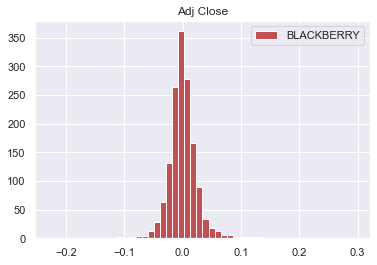

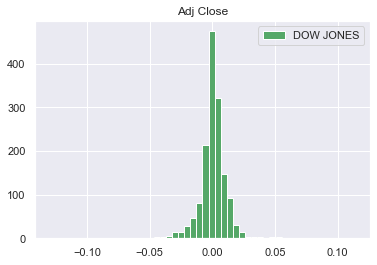

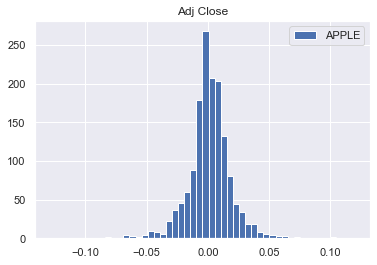

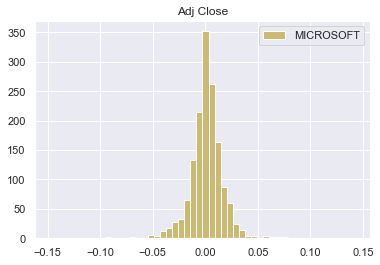

In [9]:
daily_pct_change_bb.hist(bins=50,label = 'BLACKBERRY',color ='r')
plt.legend()
daily_pct_change_dj.hist(bins=50,label ='DOW JONES',color ='g')
# Show the plot
plt.legend()
daily_pct_change_ap.hist(bins=50,label ='APPLE',color ='b')
plt.legend()
daily_pct_change_ms.hist(bins=50,label ='MICROSOFT',color ='y')
plt.legend()
plt.show()

# Volatality of stock 

In [10]:
min_periods = 75 

# Calculate the volatility
ap_vol = daily_pct_change_ap.rolling(min_periods).std() * np.sqrt(min_periods) 

ap_vol.fillna(0,inplace=True)

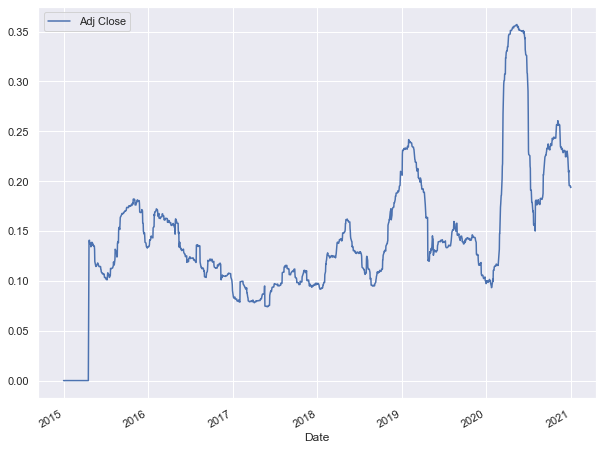

In [11]:
ap_vol.plot(figsize=(10, 8))
# Show the plot
plt.show()

In [12]:
returnsap =daily_pct_change_ap

# Box plot

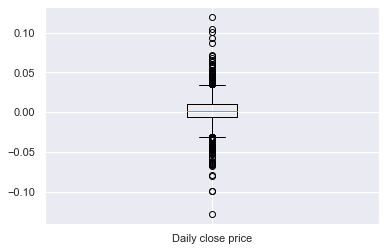

In [13]:
plt.boxplot(returnsap,labels=["Daily close price"])


plt.show()

# Min , Max,std,mean,count

In [14]:
returnsap.describe()

,Adj Close
count,1512.000000
mean,0.001275
std,0.018656
min,-0.128647
25%,-0.006477
50%,0.000899
75%,0.010031
max,0.119808


# quantile

In [15]:
np.quantile(returnsap,0.5)

0.0008990978620975199

# skew

In [16]:
skew(returnsap)

array([-0.08089673])

# skewtest

In [17]:
skewtest(returnsap)

SkewtestResult(statistic=array([-1.28841983]), pvalue=array([0.19759986]))

# kurtosis

In [18]:
kurtosis(returnsap)

array([6.59610886])

# kurtosistest

In [19]:
kurtosistest(returnsap)

KurtosistestResult(statistic=array([14.56808655]), pvalue=array([4.48271671e-48]))

# histogram for calculating returns with the help of daily close price

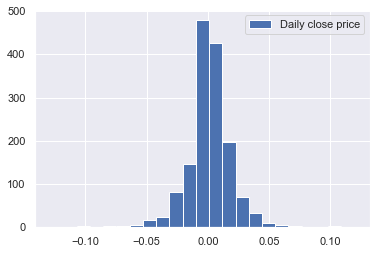

In [20]:
plt.hist(returnsap,bins="rice",label="Daily close price")

plt.legend()
plt.show()

In [21]:
t = np.linspace(0.01,0.99,1000)

q1 = np.quantile(returnsap,t)

q2 = norm.ppf(t,loc=np.mean(returnsap),scale=np.std(returnsap))

# Normal Distribution graph 

In [ ]:
# plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])

plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))

plt.xlabel("Daily returns")
plt.ylabel("Normal distribution")
plt.show()

# Another graph for visualisation to calculate risk

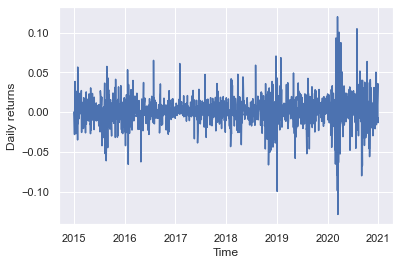

In [23]:
plt.plot(returnsap)
plt.xlabel("Time")
plt.ylabel("Daily returns")

plt.show()

# 20-days rolling standard deviation

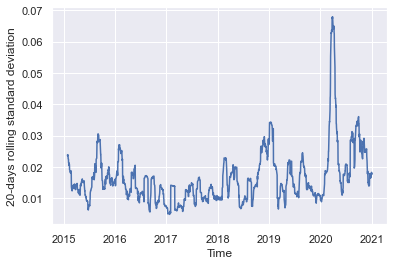

In [24]:
plt.plot(returnsap.rolling(20).std())
plt.xlabel("Time")
plt.ylabel("20-days rolling standard deviation")
plt.show()

# Partial Autocorrelation

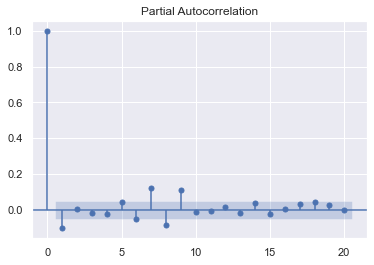

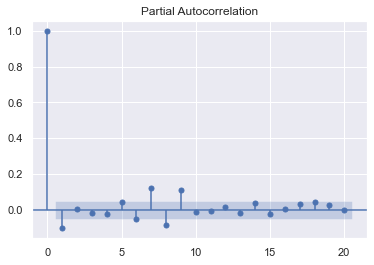

In [25]:
plot_pacf(returnsap,lags=20)

# Apple shares voulume traded graph

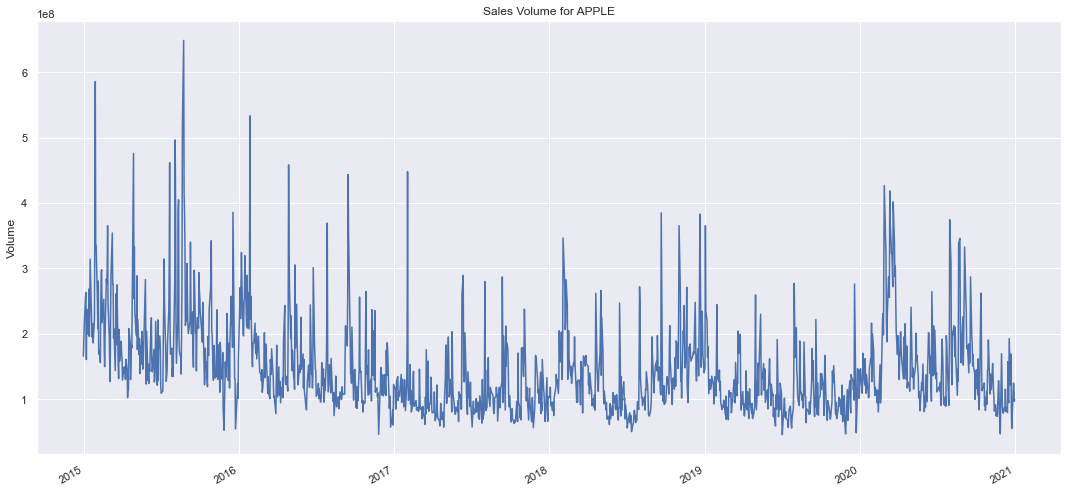

In [26]:
plt.figure(figsize=(15, 7))
ap['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title(f"Sales Volume for APPLE")
plt.tight_layout()

# Rolling Means /Moving average(Trends and Seasonality) --->analyze data points by creating a series of averages of different subsets of the full data set. 

In [27]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    ap[column_name] = ap['Adj Close'].rolling(ma).mean()

<AxesSubplot:xlabel='Date'>

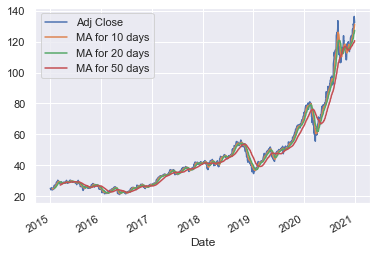

In [28]:
ap[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()

# Range of Closing and opening of an Apple stock

In [29]:
range_close = ap['Close'].max() - ap['Close'].min()
range_open = ap['Open'].max() - ap['Open'].min()
range_close, range_open

(114.1050033569336, 115.55000305175781)

In [34]:
num_vol = len(ap)
#Is there a method / attribute in Pandas that gives number of rows only?
sorted_Vol = sorted(ap['Volume'])
num_vol

1512

# Median of stocks volume traded in a day

In [35]:
sorted_Vol[int(len(ap)/2)]

128044000

# Finding mean,variance and standard deviation without using inbuilt functions of python library

In [11]:
def mean(data):
    mean, elements = 0, 0
    for value in data:
        elements += 1
    mean = data.sum()
    mean /= elements
    return mean

In [9]:
def variance(data):
    v, elements = 0, 0
    mean_data = mean(data)
    for value in data:
        elements += 1
        z = ((value - mean_data)**2)
        v += z
    v /= elements
    return v

In [12]:
mean(ap.Close)

48.104024427908435

In [13]:
variance(ap.Close)

629.0075974402498

In [14]:
sd_ap = variance(ap.Close) ** 0.5
sd_ap

25.080023872401913

# Covariance

In [18]:
cv = sd_ap/mean(ap.Close)*100
cv

52.13705957177935

# Correlation between closing price and volume of stock traded

In [23]:
ap1 = ap[['Close','Volume']]
ap1.corr(method='pearson')

,Close,Volume
Close,1.000000,-0.104599
Volume,-0.104599,1.000000


# Linear Regression

Estimated coefficients:
b_0 = 46.688442038431624 		
b_1 = 9.699031025972516e-09


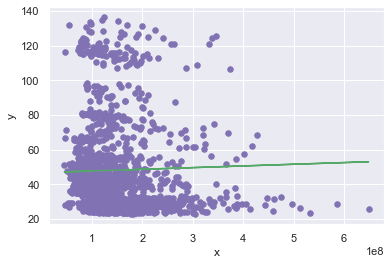

In [24]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)

    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)

    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x

    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x

    return (b_0, b_1)

def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
            marker = "o", s = 30)

    # predicted response vector
    y_pred = b[0] + b[1]*x

    # plotting the regression line
    plt.plot(x, y_pred, color = "g")

    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')

    # function to show plot
    plt.show()

def main():
    # observations / data
    x = ap1['Volume']
    y = ap1['Close']

    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {} \
        \nb_1 = {}".format(b[0], b[1]))

    # plotting regression line
    plot_regression_line(x, y, b)

if __name__ == "__main__":
    main()


# Finding Central Moments

In [28]:
ap2 = ap['Close']
print("0th moment = ",stats.moment(ap2,moment=0))
print("1st moment = ",stats.moment(ap2,moment=1))
print("2nd moment = ",stats.moment(ap2,moment=2))
print("3rd moment = ",stats.moment(ap2,moment=3))
print("4th moment = ",stats.moment(ap2,moment=4))

0th moment =  1.0
1st moment =  0.0
2nd moment =  629.0075974402504
3rd moment =  26162.73552939183
4th moment =  2053524.4047724027


# Curve fitting --> stock price and volume in a straight line

-3.675302175648029e-08
53.468161342123


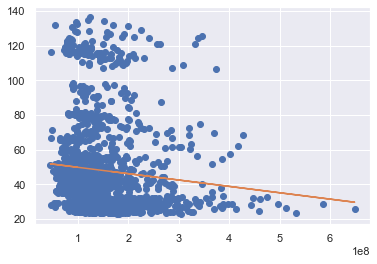

In [29]:
	x = ap1['Volume']
	y = ap1['Close']
m, b = np.polyfit(x, y, 1)
print(m)
print(b)
plt.plot(x, y, 'o')
plt.plot(x, m*x + b)

# Using linear regression for prediction/estimation of apple stock price 

In [80]:
X  = ap[['Open','High','Low','Volume']]
y = ap['Close']

In [81]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X ,y , random_state = 0)

In [83]:
X_train.shape

(1134, 4)

In [84]:
X_test.shape

(378, 4)

In [85]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [86]:
regressor.fit(X_train,y_train)

LinearRegression()

In [87]:
print(regressor.coef_)

[-5.53506198e-01  8.06313814e-01  7.47227115e-01 -3.50154999e-10]


In [88]:
print(regressor.intercept_)

0.038177807605890735


In [89]:
predicted=regressor.predict(X_test)

In [90]:
print(X_test)

                 Open       High        Low     Volume
Date                                                  
2017-09-25  37.497501  37.957500  37.290001  177549200
2015-11-02  30.200001  30.340000  29.902500  128813200
2020-05-21  79.665001  80.222504  78.967499  102688800
2016-09-27  28.250000  28.295000  28.084999   98429600
2015-01-14  27.260000  27.622499  27.125000  195826400
...               ...        ...        ...        ...
2020-07-08  94.180000  95.375000  94.089996  117092000
2019-03-22  48.834999  49.422501  47.695000  169630800
2020-01-16  78.397499  78.925003  78.022499  108829200
2015-03-31  31.522499  31.622499  31.090000  168362400
2019-10-15  59.097500  59.412498  58.720001   87360000

[378 rows x 4 columns]


In [91]:
predicted.shape

(378,)

In [92]:
dframe=pd.DataFrame(y_test,predicted)

In [93]:
dfr=pd.DataFrame({'Actual':y_test,'Predicted':predicted})

In [94]:
print(dfr)

               Actual  Predicted
Date                            
2017-09-25  37.637501  37.690665
2015-11-02  30.295000  30.084706
2020-05-21  79.212502  79.598318
2016-09-27  28.272499  28.167684
2015-01-14  27.450001  27.421968
...               ...        ...
2020-07-08  95.342499  95.076740
2019-03-22  47.762501  48.437348
2020-01-16  78.809998  78.545416
2015-03-31  31.107500  31.260276
2019-10-15  58.830002  59.079051

[378 rows x 2 columns]


In [96]:
dfr.head(25)

,Actual,Predicted
Date,,
2017-09-25,37.637501,37.690665
2015-11-02,30.295000,30.084706
2020-05-21,79.212502,79.598318
2016-09-27,28.272499,28.167684
2015-01-14,27.450001,27.421968
2015-04-08,31.400000,31.395965
2017-11-08,44.060001,43.927355
2017-09-21,38.347500,38.367230
2020-01-24,79.577499,80.163022


In [97]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [98]:
regressor.score(X_test,y_test)

0.999671252825814

In [99]:
import math

In [100]:

print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 0.21745261560698304


In [101]:

print('Mean Squared  Error:',metrics.mean_squared_error(y_test,predicted))

Mean Squared  Error: 0.18196781262512704


In [102]:

print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root Mean Squared Error: 0.42657685430075437


In [103]:

graph=dfr.head(20)

<AxesSubplot:xlabel='Date'>

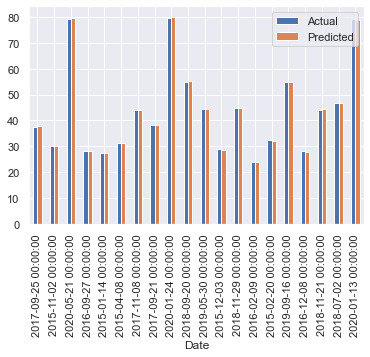

In [104]:
graph.plot(kind='bar')